# Glasgow GP Boundaries

In [2]:
#import h3
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
import shapely
from shapely.ops import unary_union
from shapely.geometry import mapping, Polygon

## Glasgow GP Postcodes

In [12]:
glasgowdf = pd.read_excel('./Glasgow NW Data for PHS.xls',header=None)

In [13]:
glasgowdf.head(5)

,0,1,2,3,4,5,6,7,8
0,Glasgow North West Practice Catchments,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Notes col shows where further mapping may allo...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sorted by CHI/pc sect (final)
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,CHI,Practice,Name of Centre,Main Address 1,Town,Post Code,pc sect (final),pc detail in file,Notes
4,40008,Fulton Street Medical Centre,NaN,94 Fulton Street,Glasgow,G13 1JE,G12 0,NaN,NaN


Set headers correctly, remove NaN column and drop first three rows that are irrelevant.

In [14]:
glasgowdf.columns = glasgowdf.iloc[3] #change headers

In [15]:
glasgowdf = glasgowdf.dropna(axis=1, how='all') # drop the NaN column

In [16]:
glasgow = glasgowdf.drop(glasgowdf.index[0:4]) # drop first 3 rows

In [17]:
glasgow.head(3)

3,CHI,Practice,Name of Centre,Main Address 1,Town,Post Code,pc sect (final),pc detail in file,Notes
4,40008,Fulton Street Medical Centre,NaN,94 Fulton Street,Glasgow,G13 1JE,G12 0,NaN,NaN
5,40008,Fulton Street Medical Centre,NaN,94 Fulton Street,Glasgow,G13 1JE,G12 9,NaN,NaN
6,40008,Fulton Street Medical Centre,NaN,94 Fulton Street,Glasgow,G13 1JE,G13 1,NaN,NaN


In [25]:
glasgow = glasgow.rename(columns = {'pc sect (final)': 'Sector'})

In [33]:
glasgow.head(3)

3,CHI,Practice,Name of Centre,Main Address 1,Town,Post Code,Sector,pc detail in file,Notes
4,40008,Fulton Street Medical Centre,NaN,94 Fulton Street,Glasgow,G13 1JE,G12 0,NaN,NaN
5,40008,Fulton Street Medical Centre,NaN,94 Fulton Street,Glasgow,G13 1JE,G12 9,NaN,NaN
6,40008,Fulton Street Medical Centre,NaN,94 Fulton Street,Glasgow,G13 1JE,G13 1,NaN,NaN


In [34]:
glasgow.shape

(582, 9)

## Scotland Postcode Sectors Shapefile

In [18]:
gdf = gpd.read_file('~/Desktop/GP_Boundaries/Sector_21_1/Sector_21_1.shp')

In [83]:
gdf.tail(5)

,OBJECTID,Sector,Shape_Leng,Shape_Area,geometry
952,953,TD9 8,9.459861e+04,1.686749e+08,"POLYGON ((356527.000 623577.000, 356534.000 62..."
953,954,TD9 9,7.421040e+04,1.296159e+08,"POLYGON ((351609.000 615527.000, 351665.000 61..."
954,955,ZE1 0,8.889355e+04,2.795350e+07,"MULTIPOLYGON (((438784.396 1135037.798, 438780..."
955,956,ZE2 9,2.257610e+06,1.430175e+09,"MULTIPOLYGON (((419888.201 1069141.801, 419895..."
956,957,ZE3 9,4.897123e+04,9.349566e+06,"MULTIPOLYGON (((438453.002 1107576.499, 438461..."


In [29]:
gdf.shape

(957, 5)

<AxesSubplot:>

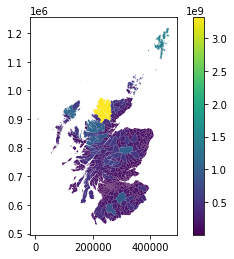

In [82]:
gdf.plot("Shape_Area",legend=True)

## Merging according to postcode sector

In [51]:
merged = pd.merge(glasgow,gdf)

In [52]:
merged.head(3)

,CHI,Practice,Name of Centre,Main Address 1,Town,Post Code,Sector,pc detail in file,Notes,OBJECTID,Shape_Leng,Shape_Area,geometry
0,40008,Fulton Street Medical Centre,NaN,94 Fulton Street,Glasgow,G13 1JE,G12 0,NaN,NaN,354,8275.952973,2.261526e+06,"POLYGON ((255713.000 669064.000, 255740.000 66..."
1,40012,Buckingham Terrace Medical Practice,NaN,31 Buckingham Terrace,Glasgow,G12 8ED,G12 0,NaN,NaN,354,8275.952973,2.261526e+06,"POLYGON ((255713.000 669064.000, 255740.000 66..."
2,40031,Drs Reid & MacLaren Partnership,Radnor Street Surgery,3 Radnor Street,Glasgow,G3 7UA,G12 0,NaN,NaN,354,8275.952973,2.261526e+06,"POLYGON ((255713.000 669064.000, 255740.000 66..."


In [53]:
merged.shape

(582, 13)

In [67]:
#gp_merged = merged.groupby('CHI')
gp_merged = merged.sort_values(by=['CHI'])

In [69]:
gp_merged.head(10)

,CHI,Practice,Name of Centre,Main Address 1,Town,Post Code,Sector,pc detail in file,Notes,OBJECTID,Shape_Leng,Shape_Area,geometry
0,40008,Fulton Street Medical Centre,NaN,94 Fulton Street,Glasgow,G13 1JE,G12 0,NaN,NaN,354,8275.952973,2.261526e+06,"POLYGON ((255713.000 669064.000, 255740.000 66..."
134,40008,Fulton Street Medical Centre,NaN,94 Fulton Street,Glasgow,G13 1JE,G61 2,NaN,NaN,449,11449.760087,4.068912e+06,"POLYGON ((256396.100 672127.195, 256382.999 67..."
131,40008,Fulton Street Medical Centre,NaN,94 Fulton Street,Glasgow,G13 1JE,G61 1,NaN,NaN,448,10004.508662,2.588603e+06,"POLYGON ((254246.000 671579.000, 254242.000 67..."
112,40008,Fulton Street Medical Centre,NaN,94 Fulton Street,Glasgow,G13 1JE,G13 4,NaN,NaN,360,5433.053784,1.149635e+06,"POLYGON ((251459.361 669988.999, 251566.597 66..."
92,40008,Fulton Street Medical Centre,NaN,94 Fulton Street,Glasgow,G13 1JE,G13 3,NaN,NaN,359,6875.685386,1.925226e+06,"POLYGON ((252857.978 669999.888, 252900.000 66..."
73,40008,Fulton Street Medical Centre,NaN,94 Fulton Street,Glasgow,G13 1JE,G13 2,NaN,NaN,358,7872.092451,1.484728e+06,"POLYGON ((253436.404 670545.898, 253447.799 67..."
54,40008,Fulton Street Medical Centre,NaN,94 Fulton Street,Glasgow,G13 1JE,G13 1,NaN,NaN,357,11000.347896,2.107313e+06,"POLYGON ((254549.214 669850.153, 254549.900 66..."
27,40008,Fulton Street Medical Centre,NaN,94 Fulton Street,Glasgow,G13 1JE,G12 9,NaN,NaN,356,5336.337471,8.814640e+05,"POLYGON ((255685.000 668096.000, 255817.195 66..."
200,40012,Buckingham Terrace Medical Practice,NaN,31 Buckingham Terrace,Glasgow,G12 8ED,G12 8,NaN,NaN,355,4163.160327,7.278606e+05,"POLYGON ((257182.000 667387.000, 257220.000 66..."
179,40012,Buckingham Terrace Medical Practice,NaN,31 Buckingham Terrace,Glasgow,G12 8ED,G11 7,NaN,NaN,353,4958.324419,1.036381e+06,"POLYGON ((254673.000 667945.000, 254768.000 66..."


In [107]:
TEST = gp_merged.head(30)

In [110]:
test = gpd.GeoDataFrame(TEST, crs="EPSG:4326")

C:\Users\yeehil01\AppData\Local\Temp\ipykernel_13504\958066547.py:1: FutureWarning: CRS mismatch between CRS of the passed geometries and 'crs'. Use 'GeoDataFrame.set_crs(crs, allow_override=True)' to overwrite CRS or 'GeoDataFrame.to_crs(crs)' to reproject geometries. CRS mismatch will raise an error in the future versions of GeoPandas.
  test = gpd.GeoDataFrame(TEST, crs="EPSG:4326")


In [70]:
geomerged = gpd.GeoDataFrame(gp_merged, crs="EPSG:4326")

C:\Users\yeehil01\AppData\Local\Temp\ipykernel_13504\3678873290.py:1: FutureWarning: CRS mismatch between CRS of the passed geometries and 'crs'. Use 'GeoDataFrame.set_crs(crs, allow_override=True)' to overwrite CRS or 'GeoDataFrame.to_crs(crs)' to reproject geometries. CRS mismatch will raise an error in the future versions of GeoPandas.
  geomerged = gpd.GeoDataFrame(gp_merged, crs="EPSG:4326")


In [72]:
geomerged

,CHI,Practice,Name of Centre,Main Address 1,Town,Post Code,Sector,pc detail in file,Notes,OBJECTID,Shape_Leng,Shape_Area,geometry
0,40008,Fulton Street Medical Centre,NaN,94 Fulton Street,Glasgow,G13 1JE,G12 0,NaN,NaN,354,8275.952973,2.261526e+06,"POLYGON ((255713.000 669064.000, 255740.000 66..."
134,40008,Fulton Street Medical Centre,NaN,94 Fulton Street,Glasgow,G13 1JE,G61 2,NaN,NaN,449,11449.760087,4.068912e+06,"POLYGON ((256396.100 672127.195, 256382.999 67..."
131,40008,Fulton Street Medical Centre,NaN,94 Fulton Street,Glasgow,G13 1JE,G61 1,NaN,NaN,448,10004.508662,2.588603e+06,"POLYGON ((254246.000 671579.000, 254242.000 67..."
112,40008,Fulton Street Medical Centre,NaN,94 Fulton Street,Glasgow,G13 1JE,G13 4,NaN,NaN,360,5433.053784,1.149635e+06,"POLYGON ((251459.361 669988.999, 251566.597 66..."
92,40008,Fulton Street Medical Centre,NaN,94 Fulton Street,Glasgow,G13 1JE,G13 3,NaN,NaN,359,6875.685386,1.925226e+06,"POLYGON ((252857.978 669999.888, 252900.000 66..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,43576,Barclay Medical Practice,Maryhill Health & Care Centre,51 Garbraid Avenue,Glasgow,G20 8FB,G20 8,NaN,NaN,377,6222.473064,7.876317e+05,"POLYGON ((256356.000 669082.000, 256354.008 66..."
379,43576,Barclay Medical Practice,Maryhill Health & Care Centre,51 Garbraid Avenue,Glasgow,G20 8FB,G20 7,NaN,NaN,376,7644.619213,7.315555e+05,"POLYGON ((258593.712 668239.909, 258600.450 66..."
236,43576,Barclay Medical Practice,Maryhill Health & Care Centre,51 Garbraid Avenue,Glasgow,G20 8FB,G3 6,NaN,NaN,387,7351.716307,4.849548e+05,"MULTIPOLYGON (((257583.064 666667.799, 257590...."
178,43576,Barclay Medical Practice,Maryhill Health & Care Centre,51 Garbraid Avenue,Glasgow,G20 8FB,G11 6,NaN,NaN,352,8270.639682,8.789625e+05,"MULTIPOLYGON (((256154.494 666275.191, 256144...."


C:\Users\yeehil01\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\algorithms.py:798: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  uniques = Index(uniques)


<AxesSubplot:>

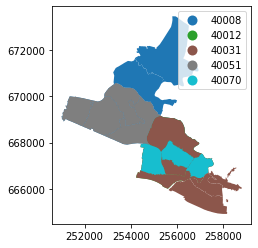

In [111]:
test.plot("CHI", legend=True)

C:\Users\yeehil01\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\algorithms.py:798: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  uniques = Index(uniques)


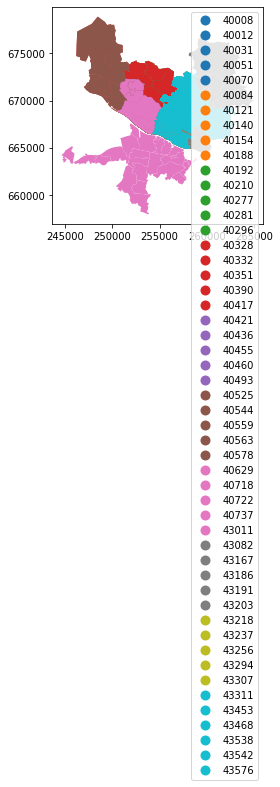

In [87]:
geomerged.plot("CHI", legend=True)
plt.savefig('test_glasgow.pdf', bbox_inches='tight')

In [95]:
gp_geomerged = geomerged.dissolve(by='CHI')

In [89]:
gp_geomerged

,geometry,Practice,Name of Centre,Main Address 1,Town,Post Code,Sector,pc detail in file,Notes,OBJECTID,Shape_Leng,Shape_Area
CHI,,,,,,,,,,,,
40008,"POLYGON ((256726.000 667298.000, 256714.000 66...",Fulton Street Medical Centre,None,94 Fulton Street,Glasgow,G13 1JE,G12 0,None,None,354,8275.952973,2.261526e+06
40012,"MULTIPOLYGON (((256142.580 666277.849, 256141....",Buckingham Terrace Medical Practice,None,31 Buckingham Terrace,Glasgow,G12 8ED,G12 8,None,None,355,4163.160327,7.278606e+05
40031,"MULTIPOLYGON (((256123.200 666331.650, 256131....",Drs Reid & MacLaren Partnership,Radnor Street Surgery,3 Radnor Street,Glasgow,G3 7UA,G11 7,None,None,353,4958.324419,1.036381e+06
40051,"POLYGON ((254576.254 669857.504, 254577.000 66...",Anniesland Medical Practice,None,46 Munro Place,Glasgow,G13 2UP,G13 2,None,None,358,7872.092451,1.484728e+06
40070,"MULTIPOLYGON (((254227.123 666481.062, 254213....",Abingdon Medical Practice,None,12 Stewartville St,Glasgow,G11 5PE,G12 8,None,None,355,4163.160327,7.278606e+05
40084,"POLYGON ((254524.000 667925.000, 254443.411 66...",Pennan Practice,None,20 Pennan Place,Glasgow,G14 0EA,G13 1,None,None,357,11000.347896,2.107313e+06
40121,"MULTIPOLYGON (((256141.594 666282.325, 256136....",The Broomhill Practice,None,41 Broomhill Drive,Glasgow,G11 7AD,G11 6,None,None,352,8270.639682,8.789625e+05
40140,"MULTIPOLYGON (((257130.001 666445.000, 257000....",Northcote Surgery,None,2 Victoria Circus,Glasgow,G12 9LD,G12 0,None,None,354,8275.952973,2.261526e+06
40154,"POLYGON ((258444.480 664900.960, 258441.840 66...",Queen's Crescent Surgery,None,10 Queens Cres,Glasgow,G4 9BL,G1 2,None,None,347,4989.044824,1.823986e+05


In [103]:
gp_geomerged.to_file('./glasgow.shp')

C:\Users\yeehil01\AppData\Local\Temp\ipykernel_13504\1023200069.py:1: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  gp_geomerged.to_file('./glasgow.shp')


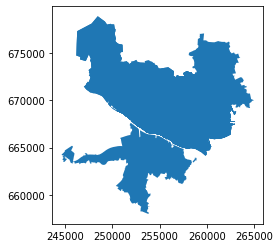

In [97]:
gp_geomerged.plot(legend=True)
plt.savefig('dissolved.pdf', bbox_inches='tight')